In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten

In [4]:
malaria_data=os.listdir(r'C:\Users\shobhit\Desktop\Flask\notebook\cell_images_malaria\cell_images_malaria')
print(malaria_data)

parasitized=os.listdir(r'C:\Users\shobhit\Desktop\Flask\notebook\cell_images_malaria\Parasitized')
print(parasitized[:2])

uninfected=os.listdir(r'C:\Users\shobhit\Desktop\Flask\notebook\cell_images_malaria\Uninfected')
print(uninfected[:2])

['Parasitized', 'Uninfected']
['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png']
['C100P61ThinF_IMG_20150918_144104_cell_128.png', 'C100P61ThinF_IMG_20150918_144104_cell_131.png']


I realized later in the code that the dataset has another cell_images folder with the same parasitized and uninfected folders, so I tried to work with double amount of images..

### Display Images Using OpenCV and Matplotlib

In [5]:
import cv2

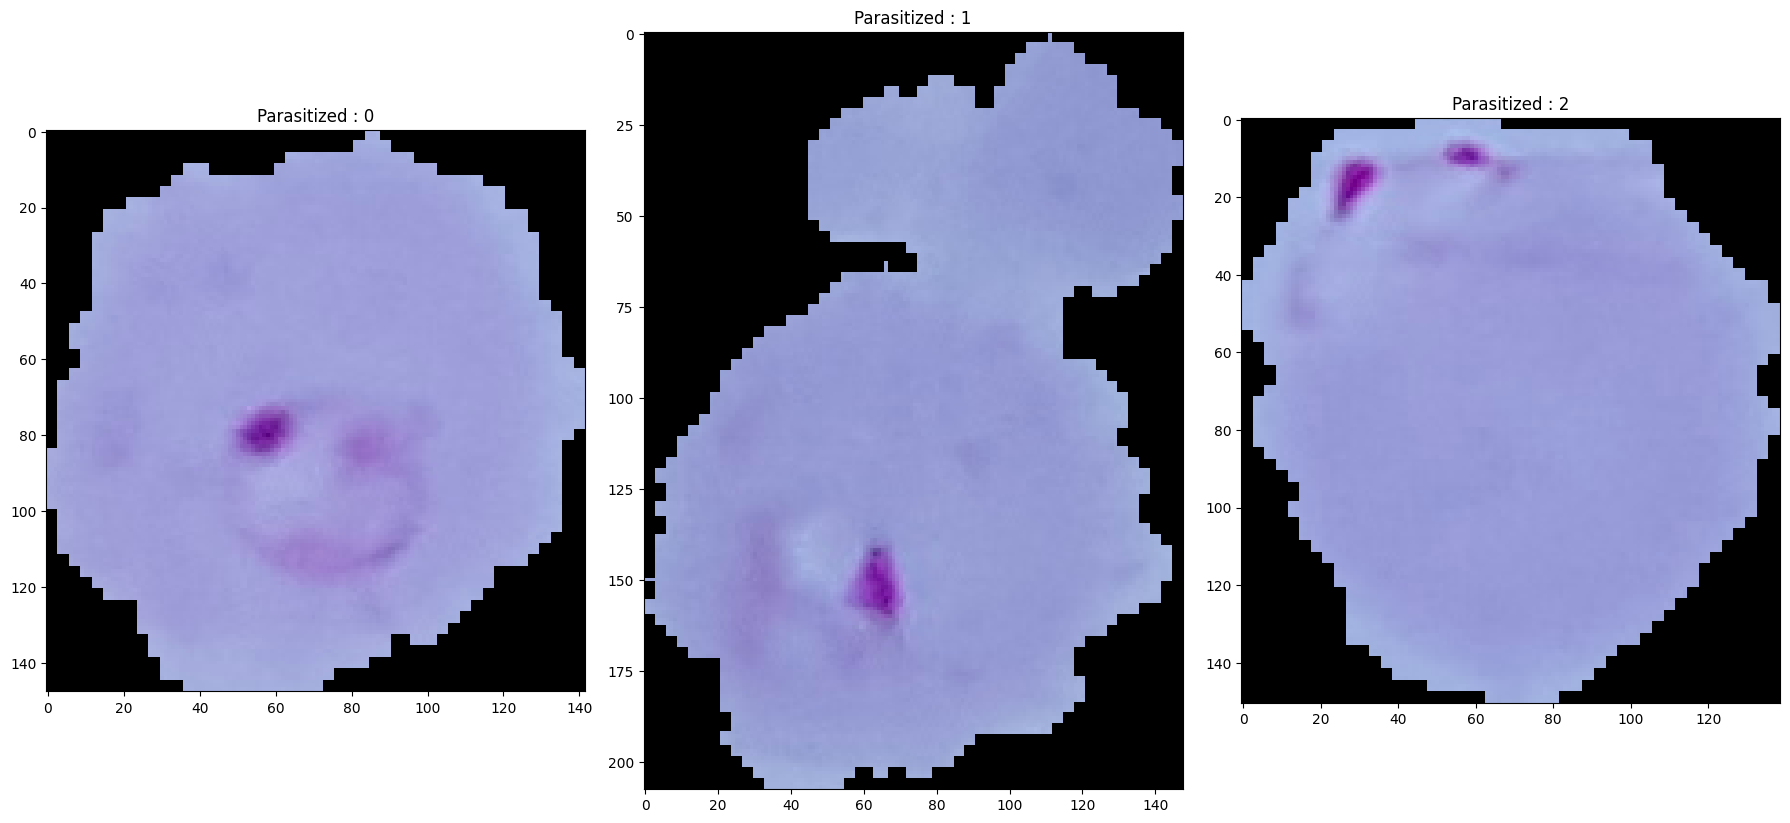

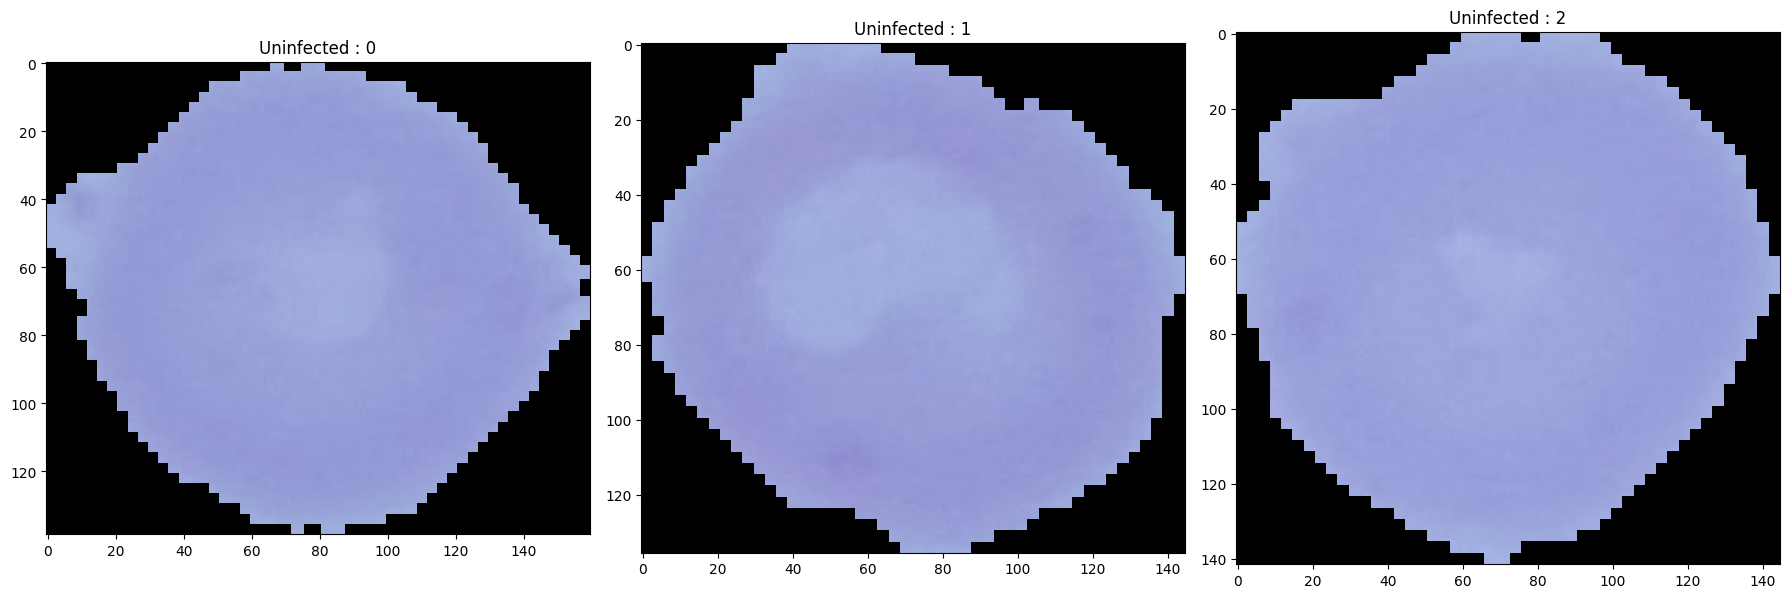

In [6]:
# show fisrt 3 parasitized images
plt.figure(figsize = (18,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = cv2.imread(r'C:\Users\shobhit\Desktop\Flask\notebook\cell_images_malaria\Parasitized' + "/" + parasitized[i])
    plt.imshow(img)
    plt.title('Parasitized : {i}'.format(i=i))
    plt.tight_layout()
plt.show()

# show fisrt 3 parasitized images
plt.figure(figsize = (18,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = cv2.imread(r'C:\Users\shobhit\Desktop\Flask\notebook\cell_images_malaria\Uninfected' + "/" + uninfected[i])
    plt.imshow(img)
    plt.title('Uninfected : {i}'.format(i=i))
    plt.tight_layout()
plt.show()

In [7]:
from tensorflow.keras.preprocessing.image import img_to_array

### Assign Images and Labels into Variables

We assign all images into one single variable with a label 1 for parasitized and 0 for uninfected.<br>
We first loop through all images in each folder, read the image, resize the image we read to 100x100, then insert them into an array format so we can later use them for our model

In [8]:
data = [] # This is where we store the images
labels = [] # This is where we store the labels 
for img in parasitized: #go through all parasitized images
    try:
        img_read = plt.imread(r'C:\Users\shobhit\Desktop\Flask\notebook\cell_images_malaria\Parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (100, 100)) #resizing the image to 100w x 100h
        img_array = img_to_array(img_resize) # convert image from abstract format to an array format
        data.append(img_array) # append the image to the data list
        labels.append(1) # add a 1 to the labels for "parasitized"
    except:
        None
        
for img in uninfected: #go through all uninfected images
    try:
        img_read = plt.imread(r'C:\Users\shobhit\Desktop\Flask\notebook\cell_images_malaria\Uninfected' + "/"+ img)
        img_resize = cv2.resize(img_read, (100, 100)) #resizing the image to 100w x 100h
        img_array = img_to_array(img_resize) # convert image from abstract format to an array format
        data.append(img_array) # append the image to the data list
        labels.append(0) # add a 0 to the labels for "uninfected"
    except:
        None

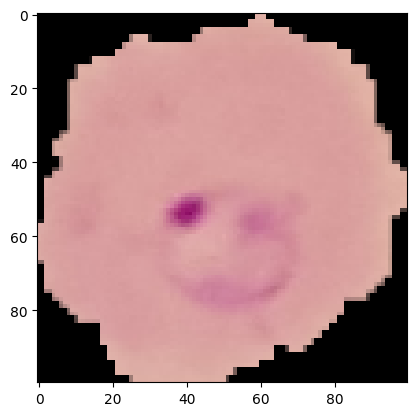

In [9]:
#show an example of our data and label
plt.imshow(data[0])
plt.show()

In [10]:
print(labels[0]) # output is 1 for parasitized

1


Use another way to generate Dataset

### Generate a tf.data.Dataset from Image files in our directory 

In [2]:
import pathlib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten
from keras.layers import Dropout
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from tensorflow.keras import layers

In [12]:
cell_images = pathlib.Path(r'C:\Users\shobhit\Desktop\Flask\notebook\cell_images_malaria\cell_images_malaria/')

In [13]:
# Train Dataset
train_data = tf.keras.utils.image_dataset_from_directory(
    cell_images, #directory for our dataset
    batch_size=64,
    image_size=(100, 100),# height x width
    seed=123, # Optional random seed for shuffling and transformations. 
    validation_split=0.2, # Optional float between 0 and 1, fraction of data to reserve for validation. 
    subset='training', # Subset of the data to return. One of "training", "validation" or "both". Only used if validation_split is set
)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.


In [14]:
# Validation Dataset
val_data = tf.keras.utils.image_dataset_from_directory(
    cell_images, #directory for our dataset
    batch_size=64,
    image_size=(100, 100),# height x width
    seed=123, # Optional random seed for shuffling and transformations. 
    validation_split=0.2, # Optional float between 0 and 1, fraction of data to reserve for validation. 
    subset='validation', # Subset of the data to return. One of "training", "validation" or "both". Only used if validation_split is set
)

Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


In [15]:
classes = train_data.class_names
print(classes)

['Parasitized', 'Uninfected']


In [16]:
classes = val_data.class_names
print(classes)

['Parasitized', 'Uninfected']


In [42]:
# import tensorflow_datasets as tfds

In [38]:
#ds, info = tfds.load('malaria', split='train', shuffle_files=True, with_info=True)

**AUTOTUNE** will prompt the tf. data runtime to tune the value dynamically at runtime, because we have a big amount of data

In [17]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)    

## Build Model

In [18]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(100, 100, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.4),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation = 'sigmoid')
])

In [19]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics="accuracy") #  binary classification problem

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 25, 25, 32)        0

In [21]:
tf.keras.backend.clear_session() # clear cache

In [22]:
model.fit(train_data, validation_data=val_data, epochs=15)

Epoch 1/15
345/345 [==============================] - 988s 1s/step - loss: 0.6062 - accuracy: 0.6865 - val_loss: 0.5897 - val_accuracy: 0.6848
Epoch 2/15
345/345 [==============================] - 264s 766ms/step - loss: 0.1992 - accuracy: 0.9365 - val_loss: 0.2431 - val_accuracy: 0.9318
Epoch 3/15
345/345 [==============================] - 257s 745ms/step - loss: 0.1566 - accuracy: 0.9486 - val_loss: 0.2823 - val_accuracy: 0.9260
Epoch 4/15
345/345 [==============================] - 264s 765ms/step - loss: 0.1415 - accuracy: 0.9533 - val_loss: 0.1578 - val_accuracy: 0.9543
Epoch 5/15
345/345 [==============================] - 250s 724ms/step - loss: 0.1309 - accuracy: 0.9560 - val_loss: 0.1576 - val_accuracy: 0.9481
Epoch 6/15
345/345 [==============================] - 242s 702ms/step - loss: 0.1216 - accuracy: 0.9594 - val_loss: 0.1401 - val_accuracy: 0.9568
Epoch 7/15
345/345 [==============================] - 238s 691ms/step - loss: 0.1186 - accuracy: 0.9595 - val_loss: 0.1598 - va

In [23]:
_,accuracy=model.evaluate(val_data)

87/87 [==============================] - 17s 189ms/step - loss: 0.1907 - accuracy: 0.9510


We can see that our model has an accuracy of 95.10%

In [25]:
# Loading model to compare the results
# model_write = pickle.load(open('./model.pkl','rb'))
from keras.models import load_model
model.save('malaria_model.h5')